In [1]:
import sys
sys.path.append('../')

import tquant as tq
from datastore import *
import matplotlib.pyplot as plt

In [2]:
def modifica_stringhe(lista_stringhe):
    # Lista per memorizzare le stringhe modificate
    stringhe_modificate = []
    
    # Rimozione del prefisso FRA
    prefisso = "FRA-"
    for stringa in lista_stringhe:
        if stringa.startswith(prefisso):
            stringa = stringa[len(prefisso):]
        stringhe_modificate.append(stringa)

    # Dizionario delle sostituzioni
    sostituzioni = {
        "1BD": "O/N",
        "2BD": "T/N",
        "3BD": "S/N",
        "CASH": "depo",
        "SWAP": "ois",
        "FRA": "fra",
    }

    # Lista temporanea per memorizzare le stringhe modificate ulteriormente
    stringhe_modificate_finali = []

    # Iterare su ciascuna stringa nella lista delle stringhe modificate
    for stringa in stringhe_modificate:
        for chiave, valore in sostituzioni.items():
            stringa = stringa.replace(chiave, valore)
        stringhe_modificate_finali.append(stringa)
    
    return stringhe_modificate_finali

In [3]:
#bootstrap della estr
tq.Settings.evaluation_date = date(2024, 4, 30)
generators = modifica_stringhe(ir_eur_curve_estr['type'])
maturities = list(modifica_stringhe(ir_eur_curve_estr['tenor']))

eur_disc_name = "EUR:ESTR"
trade_date = tq.Settings.evaluation_date
quotes = ir_eur_curve_estr['quote'].values
market_data = {}

curve_stripper = tq.CurveBootstrap(evaluation_date=trade_date,
                                   daycount_convention=tq.DayCounterConvention.Actual365)
bootstrapping_curve = curve_stripper.strip(generators, maturities, quotes, eur_disc_name, market_data=market_data)


4


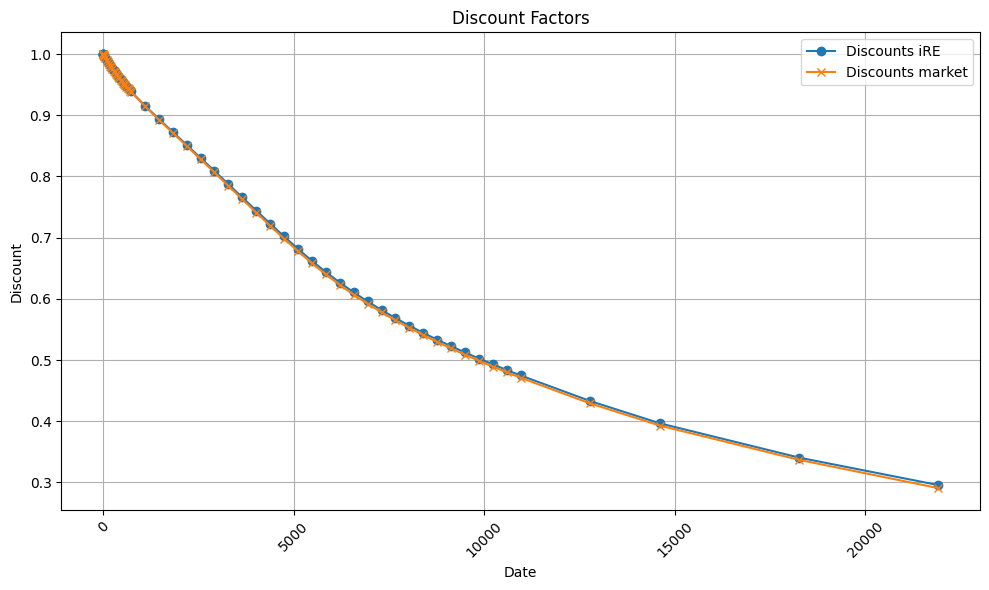

In [4]:
discount_estr = []
fwd_estr = []
discounts_estr_mkt = ir_eur_disc_estr
for maturity in discounts_estr_mkt['daycount'].values/365:
    discount_estr.append(market_data[eur_disc_name].discount(maturity))
    fwd_estr.append(market_data[eur_disc_name].inst_fwd(maturity))
    
# Plot discount factors nostri vs market
plt.figure(figsize=(10, 6))
plt.plot(discounts_estr_mkt['daycount'].values, discount_estr, label= 'Discounts iRE', marker='o', linestyle='-')
plt.plot(discounts_estr_mkt['daycount'].values, discounts_estr_mkt['market_quote'].values, label= 'Discounts market', marker='x', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Discount')
plt.title('Discount Factors')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
# Mostrare il grafico
plt.show()

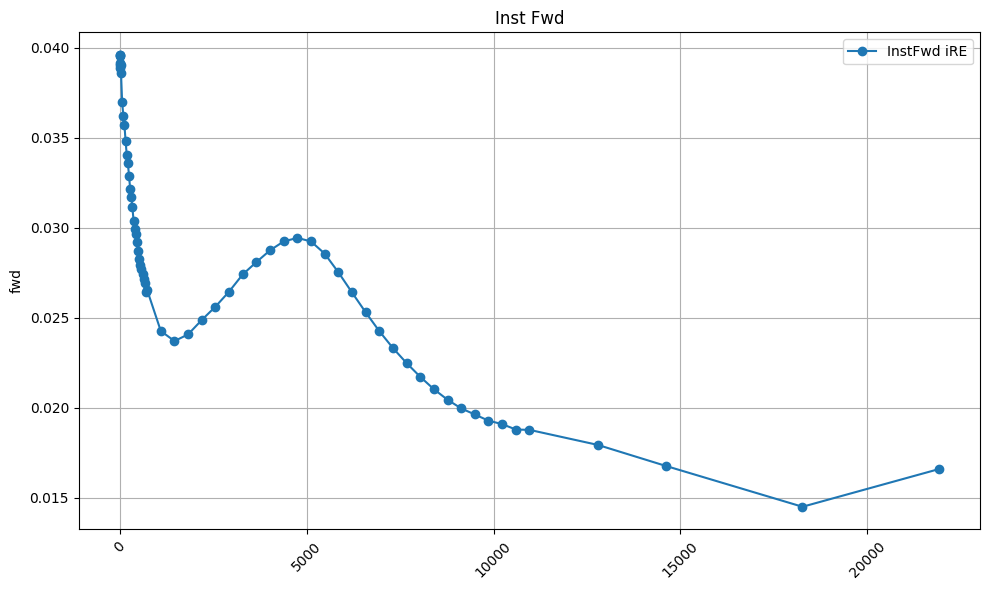

In [7]:
plt.figure(figsize=(10, 6))
plt.title('Inst Fwd')
plt.plot(discounts_estr_mkt['daycount'].values, fwd_estr, label= 'InstFwd iRE', marker='o', linestyle='-')
plt.ylabel('fwd')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()